## 시나리오: 사인곡선을 딥러닝으로 그려보자

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## 데이터 생성

In [18]:
# 랜덤한 사인 곡선 데이터 생성
np.random.seed(0)
x = np.sort(np.random.rand(1000) * 2 * np.pi)
y = np.sin(x) + 0.1 * np.random.randn(1000)


## 훈련데이터와 검증데이터로 나누기

In [19]:
# 데이터를 훈련 세트와 테스트 세트로 나누기
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,shuffle=True)

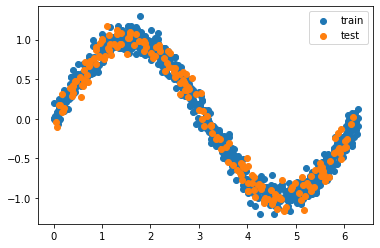

In [16]:
# 그래프로 확인
plt.scatter(x_train,y_train,label='train')
plt.scatter(x_test,y_test,label='test')
plt.legend()

## 모델 컴파일
keras에서는 Sequential로 생성된 모델을 compile하여 학습할 준비를 마친다.  
compile에서는 딥러닝 아키텍처를 어떤 방식으로 어떤 손실함수를 통해 학습할지 지정하는 역할을 한다.

* Optimizer (옵티마이저):
Optimizer는 신경망 모델을 학습시킬 때 가중치와 편향을 업데이트하는 알고리즘을 의미합니다.  
학습 중에 가중치와 편향을 조정하여 손실 함수를 최소화하도록 모델을 조정하는 역할을 합니다.  
대표적인 옵티마이저로는 SGD (Stochastic Gradient Descent), Adam, RMSprop 등이 있습니다.  
각각의 옵티마이저는 모델의 학습 속도, 수렴 속도, 안정성 등을 조절하는 다양한 매개변수를 가지고 있습니다.  

* Loss Function (손실 함수):
Loss function은 모델의 예측값과 실제값 사이의 차이를 측정하는 함수입니다.  
학습 중에 손실 함수를 최소화하려고 모델의 가중치와 편향을 조정합니다.  
회귀 문제의 경우에는 평균 제곱 오차(Mean Squared Error, MSE)가 일반적으로 사용되며, 분류 문제의 경우에는 교차 엔트로피(Cross Entropy) 등이 사용됩니다.  
모델의 예측이 실제 값과 얼마나 일치하는지를 나타내는 척도입니다.  

In [20]:
# Sequential 모델 생성
model = Sequential()

# Dense 레이어 추가
model.add(Dense(units=64, activation='relu', input_dim=1))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

## 모델 학습

fit() 메서드는 케라스 모델을 학습시키는 과정을 실행하는 함수입니다.  
모델에 입력 데이터와 실제 결과 데이터를 제공하여 가중치와 편향을 조정하고 모델을 학습시킵니다. 간단한 설명을 제공하겠습니다.
  
* X_train: 학습 데이터의 입력 특성을 나타내는 배열.
* y_train: 학습 데이터의 실제 결과 값을 나타내는 배열.
* epochs: 에포크 수, 전체 학습 데이터를 몇 번 반복하여 학습할지를 나타냄.
* batch_size: 한 번의 학습 단계에서 사용할 데이터의 개수.
* validation_data: 검증 데이터의 입력 특성과 실제 결과 값. 모델의 학습 과정에서 검증 데이터의 손실도가 기록됨.

In [21]:
# 모델 학습
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
25/25 [==============================] - 0s 10ms/step - loss: 0.5146 - val_loss: 0.4362
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.3802 - val_loss: 0.3510
Epoch 3/100
25/25 [==============================] - 0s 10ms/step - loss: 0.3380 - val_loss: 0.3146
Epoch 4/100
25/25 [==============================] - 0s 7ms/step - loss: 0.2998 - val_loss: 0.2778
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.2664 - val_loss: 0.2421
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 0.2323 - val_loss: 0.2098
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2048 - val_loss: 0.1806
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.1891 - val_loss: 0.1647
Epoch 9/100
25/25 [==============================] - 0s 6ms/step - loss: 0.1737 - val_loss: 0.1554
Epoch 10/100
25/25 [==============================] - 0s 5ms/step - loss: 0.1716 - val_loss: 0.1493
Epoch 1

## 러닝커브 확인

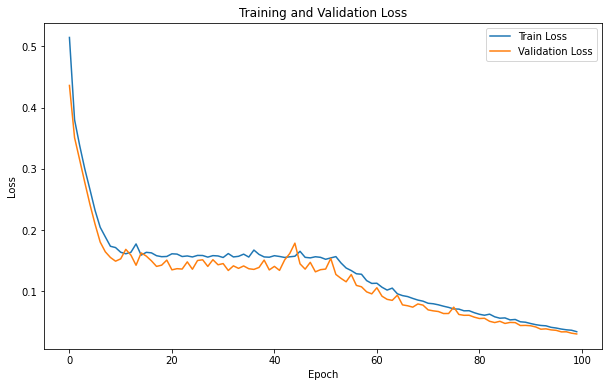

In [22]:
# 학습 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
